In [1]:
!pip install wordcloud

import requests
import wordcloud
import matplotlib.pyplot as plt

In [2]:
def download_text_file(url):
    request_file = requests.get(url, allow_redirects=True)
    
    file_contents = request_file.text
    return file_contents

file_contents = download_text_file('https://www.gutenberg.org/files/64620/64620-0.txt')

In [3]:
def calculate_frequencies(file_contents):
    
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the","for", "a", "to", "if", "is","not","on", "it", "of", "and", "or", "an", "as","in", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just","than"]
    new_content = ""
    frequencies = {}
    for ch in file_contents:
        if ch not in punctuations:
            new_content += ch
    temp_file = new_content.split(" ")
    while "" in temp_file:
        temp_file.remove("")
    for word in temp_file:
        if word.lower() not in uninteresting_words:
            if word in frequencies:
                frequencies[word] +=1
            else:
                frequencies[word] = 1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

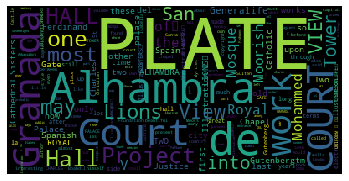

In [4]:
# Display your wordcloud image
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()